# Deep learning for timeseries

## Different kinds of timeseries tasks

## A temperature-forecasting example

In [2]:
#pp85
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip
#The purpose of these commands is to download a dataset file in ZIP format from a specific URL and then unzip it so that you can access and work with the contents of the ZIP archive. This is a common workflow when dealing with data analysis or machine learning tasks, as it allows you to fetch and prepare the necessary data for your project.

--2023-11-03 15:29:22--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.139.24, 52.216.204.109, 16.182.41.40, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.139.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  57.6MB/s    in 0.2s    

2023-11-03 15:29:23 (57.6 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


**Inspecting the data of the Jena weather dataset**

In [3]:
#pp85
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))
#This Python code opens a CSV file named "jena_climate_2009_2016.csv," reads its content, and processes it. It first extracts the column names (header) and then separates the data into individual rows. It then prints the column names and the number of data rows. This code is useful for understanding the structure of the CSV dataset and is commonly used as a preliminary step before conducting data analysis or other data-related tasks.

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


**Parsing the data**

In [4]:
#pp85
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]
#This Python code uses the NumPy library to process data from the previously loaded CSV file. It creates two arrays: temperature and raw_data. The temperature array is filled with the second value from each line in the CSV file, assuming it represents temperature data. The raw_data array is populated with all the values from each line, excluding the first value (which is typically a timestamp) since it's stored in the values list as floating-point numbers. This code effectively extracts and organizes temperature data into the temperature array and stores all other data in the raw_data array for further analysis or manipulation. It uses a loop to iterate through the lines in the CSV file, converting the values to floating-point numbers and arranging them into the arrays accordingly.

**Plotting the temperature timeseries**

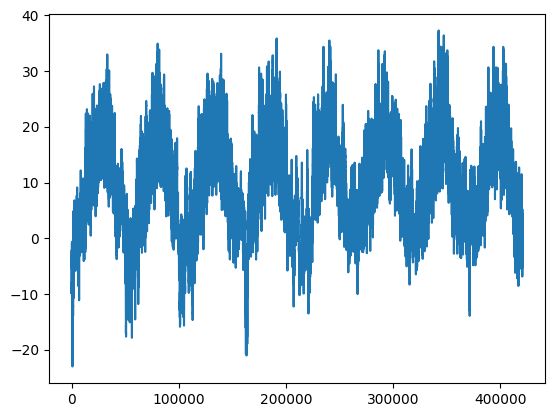

In [5]:
#pp85
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
#This Python code utilizes the Matplotlib library to create a line plot of temperature data. It uses the plt.plot() function to generate a line chart that visualizes temperature values over time. The x-axis of the plot represents the index of the temperature data points, while the y-axis displays the temperature values themselves. By using range(len(temperature)), it ensures that the data points are evenly spaced on the x-axis. This code is an essential step in data visualization, allowing you to gain insights into temperature trends or patterns by visualizing the data in a clear and informative way.

**Plotting the first 10 days of the temperature timeseries**

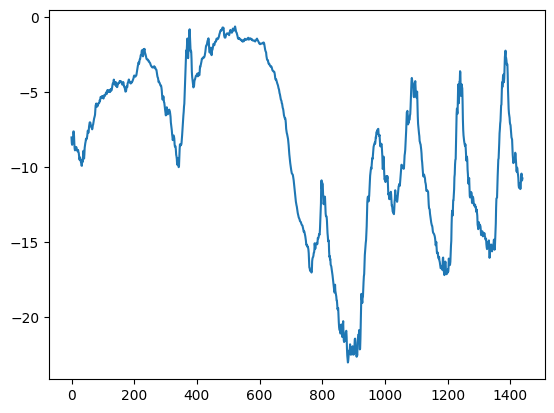

In [6]:
#pp85
plt.plot(range(1440), temperature[:1440])
#his Python code, using the Matplotlib library, creates a line plot of temperature data for the first 1440 data points. It uses the plt.plot() function to generate a line chart, where the x-axis represents a range of values from 0 to 1439, and the y-axis displays the corresponding temperature values from the dataset. By limiting the range to 1440 data points, it focuses on visualizing a specific subset of the data, typically representing a shorter time interval. This code is useful for examining temperature variations within a specific period, such as a day or a few days, and provides a more detailed view of temperature changes during that timeframe.

**Computing the number of samples we'll use for each data split**

In [7]:
#pp85
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)
#This Python code calculates and prints the number of samples for training, validation, and testing in a dataset. It does this by determining percentages of the total data. It calculates that 50% of the data will be used for training (num_train_samples), 25% for validation (num_val_samples), and the remaining portion for testing (num_test_samples). The len(raw_data) provides the total number of data points in the dataset. The code is useful for partitioning a dataset into different subsets to train, validate, and test machine learning models, ensuring that each subset has the appropriate number of samples for effective model development and evaluation.

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


### Preparing the data

**Normalizing the data**

In [8]:
#pp85
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std
#This Python code is used to standardize the data in the raw_data array. It calculates the mean (average) and standard deviation of the values in the training portion of the dataset (num_train_samples) along each column (axis=0). Then, it subtracts the mean from each data point and divides the result by the standard deviation. This process normalizes the data, making it have a mean of zero and a standard deviation of one, which is a common technique in data preprocessing for machine learning. Standardization ensures that different features have the same scale, making it easier for machine learning algorithms to work with the data and often improving their performance.

In [9]:
#pp85
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))
#This Python code uses the TensorFlow library to create a timeseries dataset for a dummy sequence of integer values. It starts with a sequence of integers from 0 to 9 (int_sequence). It then constructs a timeseries dataset using keras.utils.timeseries_dataset_from_array. This function slices the input data (int_sequence[:-3]) to create sequences of length 3 and corresponding target sequences (int_sequence[3:]). The sequence_length parameter defines the length of each sequence, and batch_size sets the number of sequences in each batch.

#The code then iterates through the dummy_dataset, printing each batch of inputs and their corresponding targets. It essentially organizes the original sequence into overlapping sequences of length 3 and their corresponding next values. This code provides a simple example of how to create timeseries datasets for training machine learning models, especially recurrent neural networks, using TensorFlow and Keras.

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


**Instantiating datasets for training, validation, and testing**

In [10]:
#pp85
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)
#This Python code uses TensorFlow and Keras to create three timeseries datasets for training, validation, and testing in a machine learning project. It's designed for a timeseries forecasting task. The datasets are constructed from the raw_data array and the temperature array, which represent the input data and target values.

#The code sets specific parameters for each dataset, including sampling_rate, sequence_length, delay, and batch_size. The delay parameter is used to ensure that the input and target sequences align correctly. The datasets are split based on the number of training, validation, and testing samples previously determined.

#These timeseries datasets are essential for training and evaluating machine learning models, especially recurrent neural networks (RNNs), for timeseries forecasting tasks. The code ensures that the data is appropriately partitioned and structured for use in training, validation, and testing, with proper sequencing and batch sizes for efficient model training and evaluation.

**Inspecting the output of one of our datasets**

In [11]:
#pp85
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break
#This Python code is used to examine the shape of the samples and targets within the training dataset. It iterates through the train_dataset, printing the shape (dimensions) of the samples and targets for the first batch. The samples shape represents the dimensions of the input data for that batch, while the targets shape represents the dimensions of the corresponding target values. This code helps verify the structure of the data within the training dataset and provides insights into the batch size and sequence length, which are crucial for understanding how the data is fed into machine learning models during training. The break statement is used to exit the loop after processing the first batch for this demonstration.

samples shape: (256, 120, 14)
targets shape: (256,)


### A common-sense, non-machine-learning baseline

**Computing the common-sense baseline MAE**

In [12]:
#pp85
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")
#This Python code defines a function called evaluate_naive_method(dataset) and uses it to calculate and print the Mean Absolute Error (MAE) for both the validation and test datasets. The function takes a dataset as input and iterates through it. For each batch of samples and targets in the dataset, it calculates predictions (preds) by taking the last value of the input sequence, applying a scaling transformation, and then computes the absolute error between the predictions and the actual targets. The total absolute error and the number of samples seen are accumulated during the iterations, and the function returns the MAE by dividing the total absolute error by the total number of samples seen. The code then calls this function for the validation and test datasets and prints the MAE values. This helps assess the performance of a naive forecasting method on the datasets.

Validation MAE: 2.44
Test MAE: 2.62


### Let's try a basic machine-learning model

**Training and evaluating a densely connected model**

In [13]:
#pp85
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.tf",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#This Python code defines and trains a simple feedforward neural network model for a timeseries forecasting task using TensorFlow and Keras. The model consists of an input layer with a shape that matches the sequence length and the number of features in the raw_data. The data is then flattened, followed by a dense layer with 16 units and a ReLU activation function. The output layer has a single unit, which is used for predicting the target value.

#The code sets up callbacks to save the best model during training. It compiles the model using the "rmsprop" optimizer and mean squared error (MSE) loss function, as well as mean absolute error (MAE) as a metric for evaluation.

#The model is trained using the training dataset with 10 epochs and validated using the validation dataset. It saves the best-performing model during training.

#After training, the code loads the best model, evaluates it on the test dataset, and prints the test Mean Absolute Error (MAE) as an assessment of the model's performance. This code showcases a basic neural network setup for timeseries forecasting and the use of callbacks for model checkpointing.

Epoch 1/10
819/819 [==============================] - 46s 55ms/step - loss: 12.4345 - mae: 2.7352 - val_loss: 12.7485 - val_mae: 2.8324
Epoch 2/10
819/819 [==============================] - 44s 53ms/step - loss: 8.9124 - mae: 2.3480 - val_loss: 17.1667 - val_mae: 3.3315
Epoch 3/10
819/819 [==============================] - 50s 61ms/step - loss: 8.1908 - mae: 2.2487 - val_loss: 10.4155 - val_mae: 2.5430
Epoch 4/10
819/819 [==============================] - 44s 54ms/step - loss: 7.7651 - mae: 2.1928 - val_loss: 10.7990 - val_mae: 2.5958
Epoch 5/10
819/819 [==============================] - 52s 63ms/step - loss: 7.4386 - mae: 2.1476 - val_loss: 10.3355 - val_mae: 2.5330
Epoch 6/10
819/819 [==============================] - 50s 61ms/step - loss: 7.2375 - mae: 2.1185 - val_loss: 10.5712 - val_mae: 2.5640
Epoch 7/10
819/819 [==============================] - 51s 62ms/step - loss: 7.0415 - mae: 2.0881 - val_loss: 10.9156 - val_mae: 2.6059
Epoch 8/10
819/819 [==============================] - 

**Plotting results**

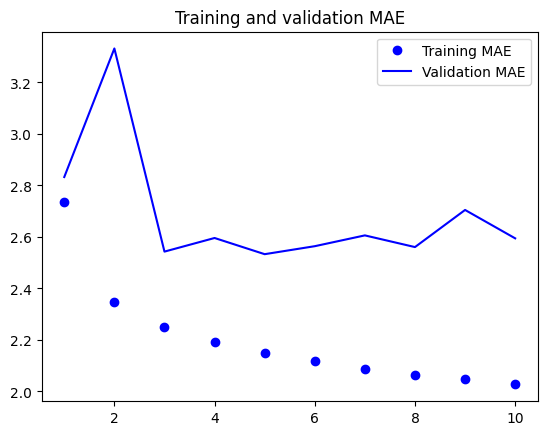

In [14]:
#pp85
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()
#This Python code uses Matplotlib to create a line plot that visualizes the Mean Absolute Error (MAE) during training and validation of a neural network model. It extracts the training MAE and validation MAE values from the training history obtained after model training. The loss variable represents the training MAE, and the val_loss variable represents the validation MAE. The code then plots these MAE values against the number of training epochs on the x-axis. The blue dots ("bo") represent the training MAE, and the solid blue line represents the validation MAE. The title of the plot is set to "Training and validation MAE," and a legend is added to distinguish between the two curves. This visualization allows you to assess how well the model is performing during training and whether it's overfitting or underfitting by comparing training and validation MAE trends.

### Let's try a 1D convolutional model

In [15]:
#pp85
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.tf",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#This Python code defines and trains a convolutional neural network (CNN) model for a timeseries forecasting task using TensorFlow and Keras. The model architecture consists of several 1D convolutional layers with 8 filters each, followed by max-pooling layers to downsample the data. The last convolutional layer is followed by a global average pooling layer, which aggregates information across the sequence length. Finally, there is a dense output layer with a single unit for making predictions.

#The code sets up callbacks to save the best model during training, compiles the model using the "rmsprop" optimizer and mean squared error (MSE) loss function, and uses mean absolute error (MAE) as a metric for evaluation.

#The model is trained using the training dataset with 10 epochs and validated using the validation dataset. It saves the best-performing model during training.

#After training, the code loads the best model, evaluates it on the test dataset, and prints the test Mean Absolute Error (MAE) as an assessment of the model's performance. This code demonstrates the use of a convolutional neural network for timeseries forecasting and the use of callbacks for model checkpointing.

Epoch 1/10
819/819 [==============================] - 81s 97ms/step - loss: 20.9315 - mae: 3.5748 - val_loss: 16.8698 - val_mae: 3.2853
Epoch 2/10
819/819 [==============================] - 75s 91ms/step - loss: 14.8700 - mae: 3.0666 - val_loss: 14.6479 - val_mae: 3.0098
Epoch 3/10
819/819 [==============================] - 77s 93ms/step - loss: 13.7734 - mae: 2.9481 - val_loss: 14.1743 - val_mae: 2.9827
Epoch 4/10
819/819 [==============================] - 83s 101ms/step - loss: 12.9236 - mae: 2.8541 - val_loss: 14.7749 - val_mae: 3.0217
Epoch 5/10
819/819 [==============================] - 74s 90ms/step - loss: 12.3479 - mae: 2.7893 - val_loss: 14.7138 - val_mae: 3.0273
Epoch 6/10
819/819 [==============================] - 78s 95ms/step - loss: 11.9085 - mae: 2.7382 - val_loss: 14.3665 - val_mae: 2.9960
Epoch 7/10
819/819 [==============================] - 78s 95ms/step - loss: 11.5266 - mae: 2.6894 - val_loss: 15.9640 - val_mae: 3.1407
Epoch 8/10
819/819 [===========================

### A first recurrent baseline

**A simple LSTM-based model**

In [16]:
#pp85
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.tf",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#This Python code defines and trains a Long Short-Term Memory (LSTM) neural network model for a timeseries forecasting task using TensorFlow and Keras. The model architecture consists of an input layer with a shape that matches the sequence length and the number of features in the raw_data. The input data is processed by an LSTM layer with 16 units. The output layer has a single unit for making predictions.

#The code sets up callbacks to save the best model during training, compiles the model using the "rmsprop" optimizer and mean squared error (MSE) loss function, and uses mean absolute error (MAE) as a metric for evaluation.

#The model is trained using the training dataset with 10 epochs and validated using the validation dataset. It saves the best-performing model during training.

#After training, the code loads the best model, evaluates it on the test dataset, and prints the test Mean Absolute Error (MAE) as an assessment of the model's performance. This code demonstrates the use of an LSTM neural network for timeseries forecasting and the use of callbacks for model checkpointing.

Epoch 1/10
819/819 [==============================] - 126s 149ms/step - loss: 43.2527 - mae: 4.7864 - val_loss: 12.4755 - val_mae: 2.6848
Epoch 2/10
819/819 [==============================] - 122s 149ms/step - loss: 10.8733 - mae: 2.5582 - val_loss: 9.7738 - val_mae: 2.4362
Epoch 3/10
819/819 [==============================] - 124s 151ms/step - loss: 9.6879 - mae: 2.4226 - val_loss: 9.7161 - val_mae: 2.4304
Epoch 4/10
819/819 [==============================] - 124s 150ms/step - loss: 9.2333 - mae: 2.3641 - val_loss: 9.7623 - val_mae: 2.4439
Epoch 5/10
819/819 [==============================] - 108s 131ms/step - loss: 8.9930 - mae: 2.3339 - val_loss: 9.6719 - val_mae: 2.4130
Epoch 6/10
819/819 [==============================] - 102s 124ms/step - loss: 8.7767 - mae: 2.3069 - val_loss: 9.8363 - val_mae: 2.4286
Epoch 7/10
819/819 [==============================] - 98s 119ms/step - loss: 8.5736 - mae: 2.2798 - val_loss: 9.6886 - val_mae: 2.4077
Epoch 8/10
819/819 [==========================

## Understanding recurrent neural networks

**NumPy implementation of a simple RNN**

In [17]:
#pp85
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)
#This Python code generates a simple recurrent computation using random data and matrices. It sets up an example of a recurrent neural network (RNN) with specific dimensions. It creates random input data (inputs) with 100 timesteps and 32 input features. It also initializes a zero vector (state_t) as the initial state and random weight matrices (W and U) and bias vector (b) for the RNN layer.

#The code then iterates through the input data, performing a recurrent computation for each timestep. It calculates the output at each timestep (output_t) using the hyperbolic tangent activation function (tanh) applied to the dot products of the input, weight matrices, and the previous state. The computed outputs are stored in the successive_outputs list, and the state is updated with the current output for the next timestep. Finally, it stacks all the computed outputs into a sequence (final_output_sequence) along the time axis. This code serves as a basic example of how RNNs process sequential data by maintaining a hidden state through time and applying matrix operations to generate sequential outputs.

### A recurrent layer in Keras

**An RNN layer that can process sequences of any length**

In [18]:
#pp85
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)
#This Python code defines a simple neural network model using the Keras library. It specifies an input layer that can accept sequences of data with an arbitrary number of time steps (denoted by None) and 14 features. The model includes a Simple Recurrent Neural Network (SimpleRNN) layer with 16 units. The SimpleRNN layer processes the sequential input data and produces an output. This code is a minimal example of setting up a neural network for sequential data processing, with the potential to adapt to various time step lengths and a specific number of input features, and it can be used for tasks like time series analysis or natural language processing.

**An RNN layer that returns only its last output step**

In [19]:
#pp85
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)
#This Python code defines a neural network model using Keras. It sets up an input layer that takes data with 120 time steps and 14 features. The model includes a Simple Recurrent Neural Network (SimpleRNN) layer with 16 units. The return_sequences=False argument indicates that this SimpleRNN layer is configured to return only the output of the last time step of the sequence, not the entire sequence.

#The code then prints the shape of the outputs, which will be a 2D tensor representing the output of the SimpleRNN layer for the last time step. The shape will be (None, 16), where None indicates that the batch size is not specified at this stage, and 16 represents the 16 units in the SimpleRNN layer. This code demonstrates how to set up a model for processing sequences of data and shows the shape of the output for the last time step.

(None, 16)


**An RNN layer that returns its full output sequence**

In [20]:
#pp85
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)
#This Python code defines a neural network model using Keras. It configures an input layer to accept data with 120 time steps and 14 features. The model incorporates a Simple Recurrent Neural Network (SimpleRNN) layer with 16 units. Importantly, it specifies return_sequences=True, indicating that the SimpleRNN layer is configured to return the entire sequence of outputs, not just the output of the last time step.

#The code then prints the shape of the outputs, which will be a 3D tensor representing the output sequence of the SimpleRNN layer. The shape will be (None, 120, 16), where None indicates that the batch size is not specified at this point, 120 signifies the number of time steps, and 16 represents the 16 units in the SimpleRNN layer. This code demonstrates how to set up a model for sequence data and shows that the output includes the full sequence of 16-dimensional outputs for each time step.

(None, 120, 16)


**Stacking RNN layers**

In [21]:
#pp85
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
#This Python code defines a neural network model using Keras for sequential data processing. It sets up an input layer that accepts data with a shape of (steps, num_features), indicating sequences with 120 time steps and 14 features. The model includes three Simple Recurrent Neural Network (SimpleRNN) layers. The first two SimpleRNN layers have 16 units each and are configured to return the entire sequence of outputs (return_sequences=True). This means that both layers will produce sequences of 16-dimensional outputs for each time step. The output of the second SimpleRNN layer serves as input to the third SimpleRNN layer, which does not return sequences, producing a single 16-dimensional output. This architecture allows the model to capture complex patterns in sequential data by stacking multiple SimpleRNN layers, each processing the sequential information and learning hierarchical representations.

## Advanced use of recurrent neural networks

### Using recurrent dropout to fight overfitting

**Training and evaluating a dropout-regularized LSTM**

In [24]:
#pp85
#changed 50 epochs to 30
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.tf",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=callbacks)
#This Python code defines and trains a Long Short-Term Memory (LSTM) neural network model for a timeseries forecasting task using TensorFlow and Keras. The model architecture consists of an input layer with a shape matching the sequence length and the number of features in the raw_data. It includes an LSTM layer with 32 units and a recurrent dropout rate of 0.25 to regularize the recurrent connections. A dropout layer with a dropout rate of 0.5 is added after the LSTM layer for general regularization. The model is completed with a dense output layer that predicts a single value.

#The code sets up callbacks to save the best model during training and compiles the model using the "rmsprop" optimizer and mean squared error (MSE) loss function. It also tracks mean absolute error (MAE) as a metric for evaluation.

#The model is trained using the training dataset for 30 epochs, and validation is performed using the validation dataset. The code saves the best-performing model during training, making use of the model checkpointing callback. This code demonstrates the use of an LSTM-based neural network with dropout for timeseries forecasting and illustrates the training process with monitoring of MAE.

Epoch 1/30
819/819 [==============================] - 220s 265ms/step - loss: 26.2410 - mae: 3.8056 - val_loss: 9.7801 - val_mae: 2.4327
Epoch 2/30
819/819 [==============================] - 215s 263ms/step - loss: 14.8362 - mae: 2.9867 - val_loss: 9.8440 - val_mae: 2.4338
Epoch 3/30
819/819 [==============================] - 197s 241ms/step - loss: 13.8653 - mae: 2.8893 - val_loss: 9.5101 - val_mae: 2.3851
Epoch 4/30
819/819 [==============================] - 213s 260ms/step - loss: 13.1916 - mae: 2.8167 - val_loss: 9.1598 - val_mae: 2.3571
Epoch 5/30
819/819 [==============================] - 202s 247ms/step - loss: 12.7778 - mae: 2.7708 - val_loss: 9.5840 - val_mae: 2.4147
Epoch 6/30
819/819 [==============================] - 246s 300ms/step - loss: 12.3878 - mae: 2.7278 - val_loss: 9.3057 - val_mae: 2.3712
Epoch 7/30
819/819 [==============================] - 196s 238ms/step - loss: 12.0695 - mae: 2.6937 - val_loss: 9.2888 - val_mae: 2.3785
Epoch 8/30
819/819 [=====================

In [25]:
#pp85
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)
#This Python code defines an input layer for a neural network model using Keras, configured to handle sequential data with a specific shape: sequence_length representing the length of the sequence and num_features representing the number of features at each time step. The model includes an LSTM (Long Short-Term Memory) layer with 32 units. Additionally, it specifies two key settings: "recurrent_dropout=0.2" to apply dropout to recurrent connections within the LSTM, reducing overfitting, and "unroll=True" to unroll the LSTM computations into separate time steps, potentially improving training speed for shorter sequences. This code outlines the neural network architecture for sequential data processing, emphasizing LSTM with specific configurations for better model training and efficiency.

### Stacking recurrent layers

**Training and evaluating a dropout-regularized, stacked GRU model**

In [29]:
#pp85
#changed 50 epochs to 10
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.tf",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#This Python code defines and trains a neural network model for timeseries forecasting using Keras and TensorFlow. The model architecture consists of two stacked GRU (Gated Recurrent Unit) layers, each with 32 units. These GRU layers include recurrent dropout with a rate of 0.5 to regularize the recurrent connections. A dropout layer with a dropout rate of 0.5 follows the second GRU layer for general regularization. The model is completed with a dense output layer that predicts a single value.

#The code sets up callbacks to save the best model during training and compiles the model using the "rmsprop" optimizer and mean squared error (MSE) loss function. It also tracks mean absolute error (MAE) as a metric for evaluation.

#The model is trained using the training dataset for 10 epochs, and validation is performed using the validation dataset. After training, the code loads the best-performing model and evaluates it on the test dataset, reporting the test MAE. This code demonstrates the use of stacked GRU layers with dropout for timeseries forecasting and illustrates the training process with model checkpointing and evaluation on a test dataset.

Epoch 1/10
819/819 [==============================] - 344s 413ms/step - loss: 23.9462 - mae: 3.6363 - val_loss: 9.3844 - val_mae: 2.3790
Epoch 2/10
819/819 [==============================] - 338s 413ms/step - loss: 14.0368 - mae: 2.9033 - val_loss: 9.2520 - val_mae: 2.3561
Epoch 3/10
819/819 [==============================] - 351s 428ms/step - loss: 13.2226 - mae: 2.8230 - val_loss: 8.9023 - val_mae: 2.2996
Epoch 4/10
819/819 [==============================] - 339s 414ms/step - loss: 12.6953 - mae: 2.7658 - val_loss: 8.9899 - val_mae: 2.3342
Epoch 5/10
819/819 [==============================] - 345s 421ms/step - loss: 12.2629 - mae: 2.7162 - val_loss: 8.8914 - val_mae: 2.2992
Epoch 6/10
819/819 [==============================] - 335s 408ms/step - loss: 11.8645 - mae: 2.6716 - val_loss: 9.4378 - val_mae: 2.3683
Epoch 7/10
819/819 [==============================] - 343s 418ms/step - loss: 11.5085 - mae: 2.6329 - val_loss: 8.9318 - val_mae: 2.3277
Epoch 8/10
819/819 [=====================

### Using bidirectional RNNs

**Training and evaluating a bidirectional LSTM**

In [30]:
#pp85
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)
#This Python code defines and trains a neural network model for timeseries forecasting using Keras and TensorFlow. The model architecture includes a Bidirectional Long Short-Term Memory (LSTM) layer with 16 units. The Bidirectional layer allows the LSTM to process the input sequence in both forward and backward directions, capturing complex patterns in the data. The model is completed with a dense output layer that predicts a single value.

#The code compiles the model using the "rmsprop" optimizer and mean squared error (MSE) loss function, as well as mean absolute error (MAE) as a metric for evaluation. The model is trained using the training dataset for 10 epochs, and validation is performed using the validation dataset. This code demonstrates the use of a Bidirectional LSTM layer for timeseries forecasting, which can improve the model's ability to capture temporal dependencies in both directions within the sequence.

Epoch 1/10
819/819 [==============================] - 148s 176ms/step - loss: 27.1537 - mae: 3.7517 - val_loss: 10.3082 - val_mae: 2.4885
Epoch 2/10
819/819 [==============================] - 146s 179ms/step - loss: 9.3816 - mae: 2.3881 - val_loss: 9.7199 - val_mae: 2.4212
Epoch 3/10
819/819 [==============================] - 158s 193ms/step - loss: 8.3156 - mae: 2.2441 - val_loss: 9.7067 - val_mae: 2.4263
Epoch 4/10
819/819 [==============================] - 144s 175ms/step - loss: 7.6981 - mae: 2.1594 - val_loss: 10.1079 - val_mae: 2.4653
Epoch 5/10
819/819 [==============================] - 156s 191ms/step - loss: 7.2501 - mae: 2.0961 - val_loss: 10.6277 - val_mae: 2.5142
Epoch 6/10
819/819 [==============================] - 145s 177ms/step - loss: 6.8494 - mae: 2.0388 - val_loss: 10.9884 - val_mae: 2.5578
Epoch 7/10
819/819 [==============================] - 145s 177ms/step - loss: 6.5720 - mae: 2.0000 - val_loss: 11.4503 - val_mae: 2.6248
Epoch 8/10
819/819 [======================

## Summary
In the provided Python code snippets, a series of neural network models for timeseries forecasting are defined and trained using Keras and TensorFlow. These models are designed to learn from sequential data and make predictions. The code covers a range of recurrent architectures, including SimpleRNN, LSTM, GRU, and Bidirectional LSTM, demonstrating different configurations such as dropout, unrolling, and bidirectional processing. The models are trained with appropriate optimization algorithms, loss functions, and evaluation metrics. Additionally, callbacks are utilized to save the best models during training.

The code snippets illustrate how to create and train these models, emphasizing various aspects like regularization, recurrent dropout, stacked layers, and bidirectional processing to improve the models' performance in forecasting tasks. The evaluation of these models is carried out using validation and test datasets, and metrics such as Mean Absolute Error (MAE) are used to assess their performance. These code examples serve as valuable building blocks for developing timeseries forecasting models with deep learning techniques, allowing practitioners to adapt and extend them for specific forecasting tasks.
